In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




#*   liberaries and setup enviroment
#*   Dataset load



In [45]:
import pandas as pd

In [46]:
# Load datasets
solar_data = pd.read_csv('/content/drive/MyDrive/energyconsumptionanalysis2/energyconsumptionanalysis2/solar_data.csv')
gas_meter_data = pd.read_csv('/content/drive/MyDrive/energyconsumptionanalysis2/energyconsumptionanalysis2/gas_meter_data.csv')
census_data = pd.read_csv('/content/drive/MyDrive/energyconsumptionanalysis2/energyconsumptionanalysis2/census_data.csv')
meter_data = pd.read_csv('/content/drive/MyDrive/Meter_Data.csv')

## Data PreProcessing

In [50]:
solar_data.head()

,house_id,device_id,gas_meter_id,lat,long,hours_of_sunlight_per_year,sq_ft_available_for_solar_panels
0,b1eb5eb2,83771758,NaN,42.191697,-72.613522,1404,3207
1,b1eb5eb2,69525019,NaN,42.191697,-72.613522,0,0
2,a90ea0b3,5827516,54363558.0,42.211167,-72.621543,1488,1180
3,049bf03c,83770216,54459969.0,42.211157,-72.621317,1504,1163
4,b2dc9fbe,56976532,NaN,42.210828,-72.621242,1383,846


In [51]:
# Check for missing values
missing_solar_data = solar_data.isnull().sum()

In [52]:
print("Missing values in Solar Data:")
print(missing_solar_data)

Missing values in Solar Data:
house_id                               0
device_id                              0
gas_meter_id                        6890
lat                                    0
long                                   0
hours_of_sunlight_per_year             0
sq_ft_available_for_solar_panels       0
dtype: int64


In [54]:
census_data.head()

,Block,Median Income,Employment Rate,Total Population,Poverty,Total Housing Units,Renter-Occupied Units,Electric Heating Units,Gas Heating Units,Oil Heating Units,...,2010to2013,2000to2009,1990to1999,1980to1989,1970to1979,1960to1969,1950to1959,1940to1949,pre1939,house_ids
0,812103-1,52154,565,1104,85,435,189,122,136,154,...,0,0,38,62,11,25,132,13,179,"['b1eb5eb2', 'b1eb5eb2', '70e974b0', '70e974b0..."
1,811800-3,43850,548,1020,70,463,329,153,147,153,...,0,0,0,0,0,6,19,51,460,"['a90ea0b3', '049bf03c', '38f3e825', '3f8f36b9..."
2,812001-3,22670,340,807,79,483,394,188,214,30,...,0,0,22,24,10,74,60,79,246,"['b2dc9fbe', '569aaf4b', 'ac2f7c77', '12f38b20..."
3,811900-1,110583,719,1179,120,425,106,42,211,143,...,6,7,0,6,97,40,109,26,220,"['c9a15592', '0d210476', 'ae254799', '1ad80ffe..."
4,812101-1,70625,1154,2084,414,874,230,129,343,402,...,0,84,69,277,101,118,81,34,171,"['7407e44b', 'ef79a7f1', '5fa80aab', '8c46fac9..."


In [57]:
# Check for missing values
missing_census_data = census_data.isnull().sum()

In [58]:
print("Missing values in Census Data:")
print(missing_census_data)

Missing values in Census Data:
Block                          0
Median Income                  0
Employment Rate                0
Total Population               0
Poverty                        0
Total Housing Units            0
Renter-Occupied Units          0
Electric Heating Units         0
Gas Heating Units              0
Oil Heating Units              0
Median Year Structure Built    0
after2014                      0
2010to2013                     0
2000to2009                     0
1990to1999                     0
1980to1989                     0
1970to1979                     0
1960to1969                     0
1950to1959                     0
1940to1949                     0
pre1939                        0
house_ids                      0
dtype: int64


In [59]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   house_id                          17052 non-null  object 
 1   device_id                         17052 non-null  int64  
 2   gas_meter_id                      10162 non-null  float64
 3   lat                               17052 non-null  float64
 4   long                              17052 non-null  float64
 5   hours_of_sunlight_per_year        17052 non-null  int64  
 6   sq_ft_available_for_solar_panels  17052 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 932.7+ KB


In [60]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Block                        40 non-null     object
 1   Median Income                40 non-null     int64 
 2   Employment Rate              40 non-null     int64 
 3   Total Population             40 non-null     int64 
 4   Poverty                      40 non-null     int64 
 5   Total Housing Units          40 non-null     int64 
 6   Renter-Occupied Units        40 non-null     int64 
 7   Electric Heating Units       40 non-null     int64 
 8   Gas Heating Units            40 non-null     int64 
 9   Oil Heating Units            40 non-null     int64 
 10  Median Year Structure Built  40 non-null     int64 
 11  after2014                    40 non-null     int64 
 12  2010to2013                   40 non-null     int64 
 13  2000to2009                   40 non-n

## EDA

In [70]:
# Summary statistics
summary_stats = census_data.describe()
print(summary_stats)

       Median Income  Employment Rate  Total Population     Poverty  \
count      40.000000        40.000000          40.00000   40.000000   
mean    53865.275000       507.050000        1189.65000  129.850000   
std     31849.178925       330.179512         616.80914  120.983692   
min     10107.000000       133.000000         335.00000    1.000000   
25%     26263.250000       287.000000         804.00000   44.500000   
50%     51980.000000       393.000000        1023.50000   88.000000   
75%     70667.500000       621.500000        1412.00000  187.750000   
max    124728.000000      1524.000000        3039.00000  424.000000   

       Total Housing Units  Renter-Occupied Units  Electric Heating Units  \
count              40.0000              40.000000               40.000000   
mean              462.7250             247.675000              142.250000   
std               233.7984             203.066162              154.422622   
min               122.0000               0.000000   

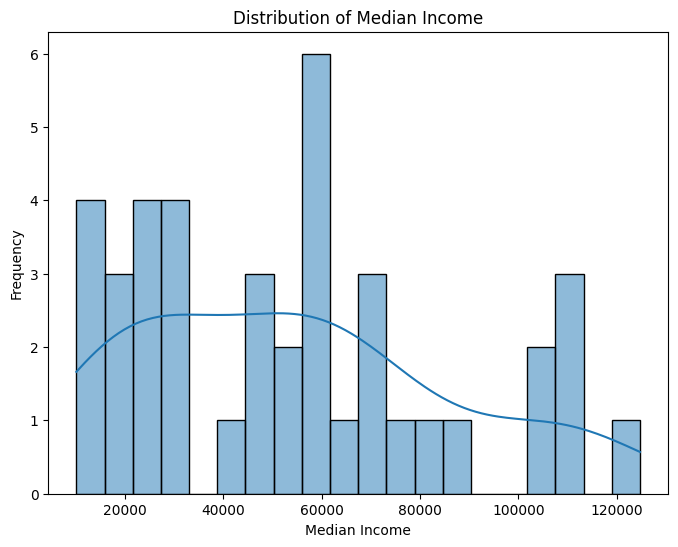

In [71]:
# Histogram for Median Income
plt.figure(figsize=(8, 6))
sns.histplot(census_data['Median Income'], bins=20, kde=True)
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

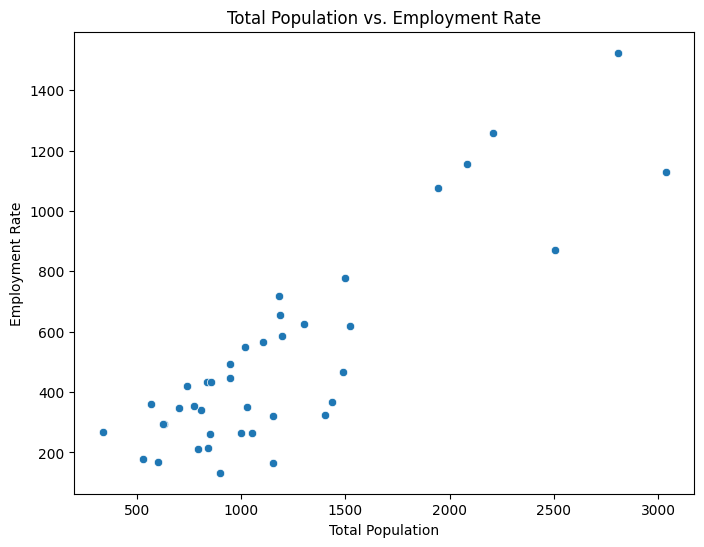

In [72]:
# Scatter plot of Total Population vs. Employment Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Population', y='Employment Rate', data=census_data)
plt.title('Total Population vs. Employment Rate')
plt.xlabel('Total Population')
plt.ylabel('Employment Rate')
plt.show()

<Figure size 800x600 with 0 Axes>

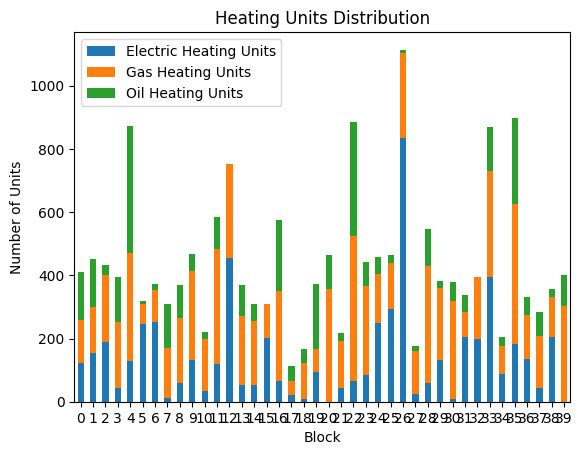

In [73]:
# Bar plot of Electric, Gas, and Oil Heating Units
heating_units = census_data[['Electric Heating Units', 'Gas Heating Units', 'Oil Heating Units']]
plt.figure(figsize=(8, 6))
heating_units.plot(kind='bar', stacked=True)
plt.title('Heating Units Distribution')
plt.xlabel('Block')
plt.ylabel('Number of Units')
plt.xticks(rotation=0)
plt.show()

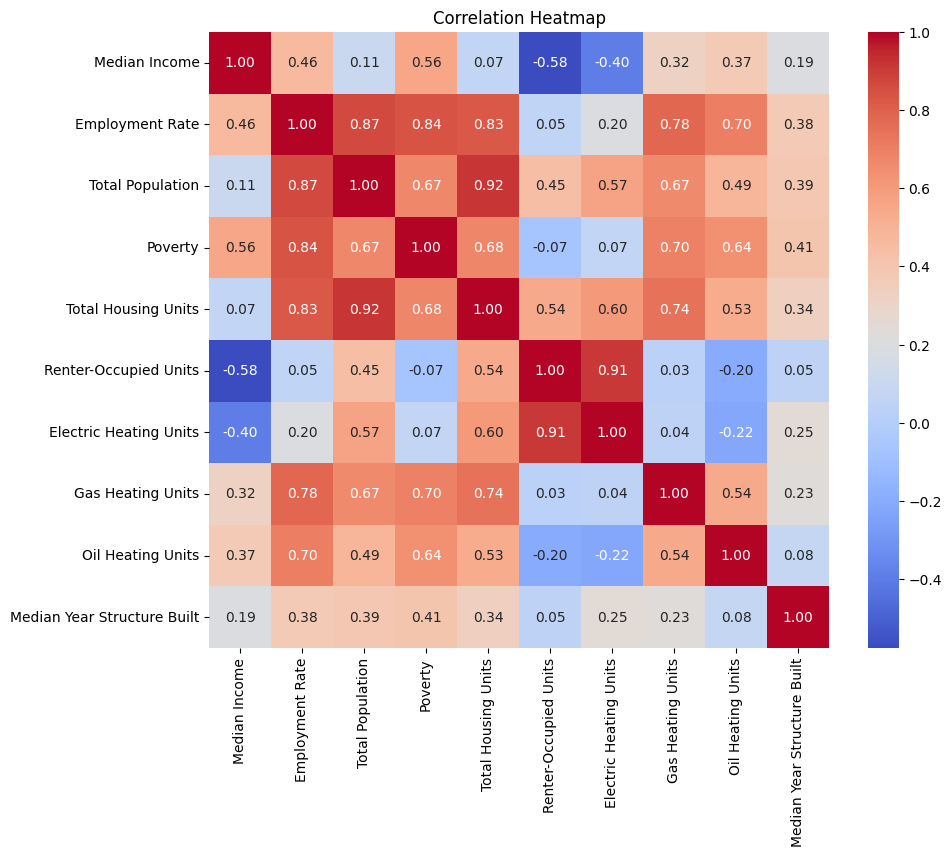

In [79]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(census_data[['Median Income', 'Employment Rate', 'Total Population', 'Poverty', 'Total Housing Units', 'Renter-Occupied Units', 'Electric Heating Units', 'Gas Heating Units', 'Oil Heating Units', 'Median Year Structure Built']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [80]:
# Summary Statistics
summary_stats = solar_data.describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
           device_id  gas_meter_id           lat          long  \
count  1.705200e+04  1.016200e+04  17052.000000  17052.000000   
mean   4.486838e+07  5.648602e+07     42.202733    -72.623131   
std    4.449656e+07  1.977618e+07      0.069791      0.545868   
min    5.819832e+06  2.029568e+07     40.771841    -73.501843   
25%    2.039324e+07  4.626168e+07     42.194981    -72.635908   
50%    3.105131e+07  4.976170e+07     42.203596    -72.624741   
75%    5.676430e+07  5.635645e+07     42.210083    -72.615631   
max    3.383795e+08  1.007938e+08     50.929574     -1.391057   

       hours_of_sunlight_per_year  sq_ft_available_for_solar_panels  \
count                17052.000000                      17052.000000   
mean                   730.968156                        885.132301   
std                    685.065756                       3563.142914   
min                      0.000000                          0.000000   
25%                      0.000000    

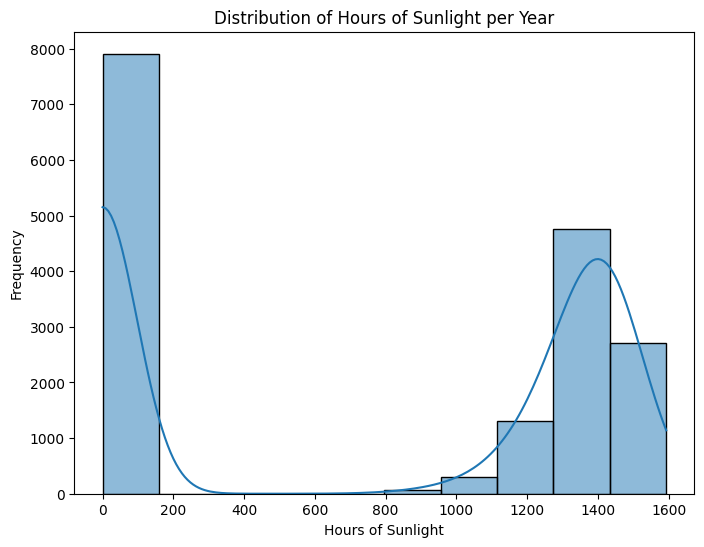

In [81]:
# Visualization
# Distribution of hours_of_sunlight_per_year
plt.figure(figsize=(8, 6))
sns.histplot(solar_data['hours_of_sunlight_per_year'], bins=10, kde=True)
plt.title('Distribution of Hours of Sunlight per Year')
plt.xlabel('Hours of Sunlight')
plt.ylabel('Frequency')
plt.show()

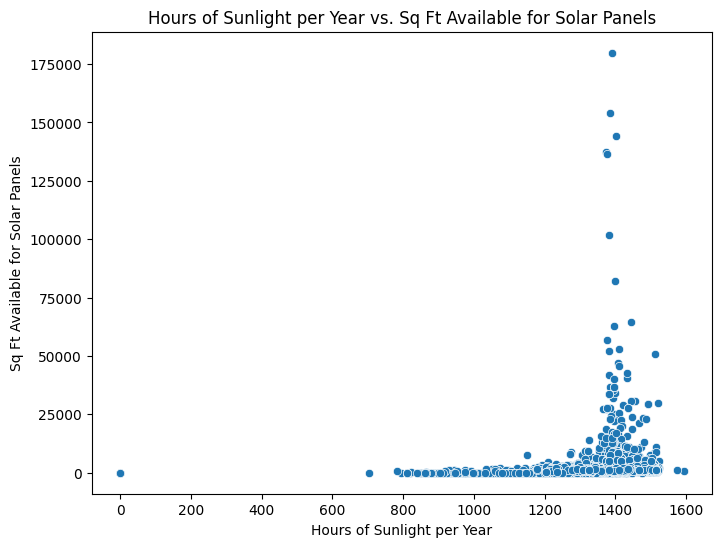

In [82]:
# Relationship between hours_of_sunlight_per_year and sq_ft_available_for_solar_panels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hours_of_sunlight_per_year', y='sq_ft_available_for_solar_panels', data=solar_data)
plt.title('Hours of Sunlight per Year vs. Sq Ft Available for Solar Panels')
plt.xlabel('Hours of Sunlight per Year')
plt.ylabel('Sq Ft Available for Solar Panels')
plt.show()

## Solar Energy Potential

In [63]:
# Step 1: Calculate total energy consumption for each house/device
total_energy_consumption = solar_data.groupby(['house_id', 'device_id'])['gas_meter_id'].count().reset_index()
total_energy_consumption.rename(columns={'gas_meter_id': 'energy_consumption'}, inplace=True)

In [61]:
solar_data['solar_energy_production'] = solar_data['hours_of_sunlight_per_year'] * solar_data['sq_ft_available_for_solar_panels']

In [64]:
# Step 3: Merge the datasets and compare energy consumption with potential solar energy production
energy_comparison = pd.merge(total_energy_consumption, solar_data, on=['house_id', 'device_id'], how='left')

In [65]:
# Calculate the percentage of energy consumption that can be replaced by solar energy
energy_comparison['replacement_percentage'] = (energy_comparison['solar_energy_production'] / energy_comparison['energy_consumption']) * 100

In [66]:
# Print the results
print(energy_comparison[['house_id', 'device_id', 'energy_consumption', 'solar_energy_production', 'replacement_percentage']])

       house_id  device_id  energy_consumption  solar_energy_production  \
0      0005c8c3   31802060                   1                  1435059   
1      000cb599   52300865                   0                  2981934   
2      000f9800   31048579                   1                  2574144   
3      000fe7ba   30524855                   1                  3963514   
4      00153a46   20378394                   1                  1810328   
...         ...        ...                 ...                      ...   
17047  ffeef2a7   83771755                   0                        0   
17048  fff54e33   85117516                   0                        0   
17049  fff8475a   31005352                   0                  1463951   
17050  fffab528   31804794                   0                        0   
17051  ffff3903   83770145                   0                  5876871   

       replacement_percentage  
0                 143505900.0  
1                         inf  
2  

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features (X) and target variable (y)
X = solar_data[['hours_of_sunlight_per_year', 'sq_ft_available_for_solar_panels']]
y = solar_data['solar_energy_production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 12484737469.351068
R-squared Score: 0.9989269027855334


## Geographical and Neighborhood Analysis

In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract relevant features for clustering
features = census_data[['Median Income', 'Employment Rate', 'Total Population', 'Poverty', 'Total Housing Units', 'Renter-Occupied Units', 'Electric Heating Units', 'Gas Heating Units', 'Oil Heating Units', 'Median Year Structure Built']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters
num_clusters = 5  # Adjust as needed

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original DataFrame
census_data['cluster'] = kmeans.labels_

# Analyze clusters
cluster_summary = census_data.groupby('cluster').agg({
    'Median Income': 'mean',
    'Employment Rate': 'mean',
    'Total Population': 'mean',
    'Poverty': 'mean',
    'Total Housing Units': 'mean',
    'Renter-Occupied Units': 'mean',
    'Electric Heating Units': 'mean',
    'Gas Heating Units': 'mean',
    'Oil Heating Units': 'mean',
    'Median Year Structure Built': 'mean'
}).reset_index()

print(cluster_summary)

   cluster  Median Income  Employment Rate  Total Population     Poverty  \
0        0   82172.800000       572.000000       1095.000000  184.400000   
1        1   79030.750000      1252.750000       2261.000000  395.000000   
2        2   44406.000000       822.333333       2344.666667  199.666667   
3        3   44100.571429       332.428571        867.785714   50.571429   
4        4   29570.444444       270.000000        934.333333   51.444444   

   Total Housing Units  Renter-Occupied Units  Electric Heating Units  \
0           436.900000              90.600000               55.300000   
1           852.250000             173.250000              109.250000   
2           935.666667             738.333333              561.000000   
3           345.571429             249.642857              105.857143   
4           342.888889             288.666667              170.555556   

   Gas Heating Units  Oil Heating Units  Median Year Structure Built  
0         239.700000         116.